<a href="https://colab.research.google.com/github/nicovakr/Pytorch-init/blob/master/Image_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image & Logistic Regression 



In [108]:
import numpy
import matplotlib
import torch
import torchvision
import torchaudio

In [109]:
 from torchvision.datasets import MNIST

In [110]:
dataset = MNIST(root='data/', download=True)

In [111]:
# 60,000 images to train the model
len(dataset)

60000

In [112]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [113]:
# an element from the training dataset
# a 28x28 image and a label
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FE9196832D0>, 5)

In [114]:
import matplotlib.pyplot as plt
# indicate to jupyter that we want to plot the graphs within the notebook
# without the following line jupyter plot graphs in a popup
%matplotlib inline

Others magic functions :

https://ipython.readthedocs.io/en/stable/interactive/magics.html .

Label: 5


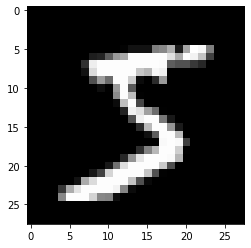

In [115]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


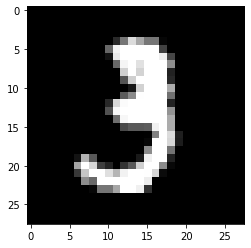

In [116]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [117]:
# to convert images into tensors
import torchvision.transforms as transforms

In [118]:
# convert with the function 'ToTensor'
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [119]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
# first dimension tracks color channels
# second and third dimensions represent pixels along height and width

torch.Size([1, 28, 28]) 5


In [120]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))
# 0 represents black
# 1 represents white

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


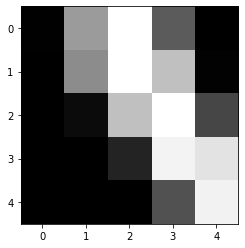

In [121]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

## Training and Validation Datasets

In [122]:
from torch.utils.data import random_split

In [123]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [124]:
from torch.utils.data import DataLoader

In [125]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

# Model

In [126]:
import torch.nn as nn

In [127]:
input_size = 28*28
num_classes = 10

In [128]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [129]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0113, -0.0057,  0.0082,  ..., -0.0239, -0.0339,  0.0182],
        [-0.0283, -0.0350, -0.0017,  ...,  0.0335,  0.0203,  0.0349],
        [-0.0282, -0.0047, -0.0266,  ...,  0.0140,  0.0216, -0.0109],
        ...,
        [-0.0299, -0.0045, -0.0188,  ...,  0.0304,  0.0039,  0.0084],
        [ 0.0068, -0.0214,  0.0280,  ...,  0.0105, -0.0007, -0.0057],
        [ 0.0026, -0.0033,  0.0315,  ..., -0.0204, -0.0320,  0.0131]],
       requires_grad=True)

In [130]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0047, -0.0350,  0.0236,  0.0328,  0.0336,  0.0034,  0.0057,  0.0235,
        -0.0204, -0.0211], requires_grad=True)

In [131]:
#for images, labels in train_loader:
#  print(labels)
#  print(images.shape)
#  outputs = model(images)
#  print(outputs)
#  break

In [132]:
images.shape

torch.Size([128, 1, 28, 28])

In [133]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [134]:
class MnistModel(nn.Module):
  def __init__(self):
    # instantiate the weights and biases using nn.Linear
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    
    xb = xb.reshape(-1, 784) # (-1, 28*28) : indicates to pytorch we want a view
                             # of xb tensor in 2D
    out = self.linear(xb)
    return out

model = MnistModel()

In [135]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [136]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0116,  0.0152,  0.0289,  ...,  0.0351,  0.0152, -0.0345],
         [-0.0290,  0.0166,  0.0297,  ..., -0.0183,  0.0172, -0.0078],
         [-0.0191,  0.0336,  0.0336,  ...,  0.0086,  0.0308,  0.0320],
         ...,
         [ 0.0132,  0.0310, -0.0068,  ...,  0.0202,  0.0180,  0.0060],
         [-0.0310,  0.0221, -0.0214,  ...,  0.0115, -0.0143, -0.0162],
         [ 0.0208,  0.0197, -0.0189,  ...,  0.0043, -0.0323, -0.0329]],
        requires_grad=True), Parameter containing:
 tensor([-0.0060,  0.0066, -0.0223, -0.0210, -0.0332,  0.0022,  0.0243, -0.0312,
         -0.0259,  0.0028], requires_grad=True)]

In [137]:
for images, labels in train_loader:
  print(images.shape)
  outputs = model(images)
  break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.3707,  0.0594, -0.0067, -0.3977, -0.1321, -0.1864,  0.0792, -0.1217,
         -0.1410,  0.1518],
        [ 0.0468,  0.1238,  0.1285, -0.0730,  0.2090, -0.1895, -0.2443,  0.2975,
          0.1649,  0.1662]])


## Soft Max function

S(y_i) = exp(y_i) / sum{j}(exp(y_j))

In [138]:
import torch.nn.functional as F

In [139]:
outputs[:2]

tensor([[ 0.3707,  0.0594, -0.0067, -0.3977, -0.1321, -0.1864,  0.0792, -0.1217,
         -0.1410,  0.1518],
        [ 0.0468,  0.1238,  0.1285, -0.0730,  0.2090, -0.1895, -0.2443,  0.2975,
          0.1649,  0.1662]], grad_fn=<SliceBackward0>)

In [140]:
# apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
# .item to get the value
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1466, 0.1074, 0.1005, 0.0680, 0.0887, 0.0840, 0.1095, 0.0896, 0.0879,
         0.1178],
        [0.0971, 0.1048, 0.1053, 0.0861, 0.1142, 0.0766, 0.0725, 0.1247, 0.1092,
         0.1094]])
Sum:  1.0


In [141]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds)
print(max_probs)

tensor([0, 7, 0, 1, 0, 0, 0, 5, 1, 0, 9, 1, 9, 0, 9, 9, 0, 7, 1, 9, 9, 9, 9, 9,
        9, 0, 1, 0, 2, 9, 9, 0, 9, 0, 9, 0, 0, 0, 9, 0, 3, 9, 0, 0, 0, 9, 0, 9,
        9, 0, 9, 9, 9, 1, 5, 5, 1, 0, 2, 9, 9, 0, 0, 9, 1, 1, 1, 1, 1, 0, 0, 0,
        9, 9, 1, 9, 9, 9, 9, 0, 0, 1, 0, 4, 9, 9, 0, 9, 9, 0, 0, 9, 9, 9, 5, 0,
        5, 9, 9, 0, 0, 0, 9, 7, 1, 9, 9, 1, 0, 1, 9, 1, 0, 0, 0, 9, 5, 1, 0, 4,
        0, 0, 4, 0, 2, 9, 9, 0])
tensor([0.1466, 0.1247, 0.1544, 0.1369, 0.1612, 0.1389, 0.1481, 0.1239, 0.1222,
        0.1560, 0.1287, 0.1368, 0.1219, 0.1561, 0.1366, 0.1268, 0.1299, 0.1271,
        0.1323, 0.1234, 0.1458, 0.1377, 0.1489, 0.1367, 0.1553, 0.1308, 0.1265,
        0.1380, 0.1179, 0.1164, 0.1327, 0.1260, 0.1449, 0.1410, 0.1370, 0.1283,
        0.1297, 0.1307, 0.1352, 0.1242, 0.1193, 0.1240, 0.1230, 0.1219, 0.1413,
        0.1246, 0.1398, 0.1486, 0.1210, 0.1226, 0.1184, 0.1353, 0.1239, 0.1285,
        0.1391, 0.1580, 0.1212, 0.1414, 0.1227, 0.1386, 0.1401, 0.1232, 0.1271,
       

In [142]:
labels

tensor([5, 8, 3, 7, 0, 3, 0, 6, 7, 2, 5, 2, 9, 3, 5, 5, 7, 4, 6, 1, 2, 7, 8, 7,
        1, 2, 2, 7, 4, 1, 8, 1, 8, 8, 2, 9, 8, 2, 2, 9, 9, 3, 9, 0, 0, 7, 6, 8,
        1, 9, 9, 1, 8, 9, 6, 0, 9, 0, 5, 6, 2, 0, 4, 9, 9, 5, 9, 2, 3, 1, 7, 6,
        5, 2, 7, 9, 1, 8, 2, 2, 0, 2, 2, 2, 6, 3, 8, 9, 1, 0, 1, 9, 4, 4, 4, 5,
        7, 1, 9, 9, 7, 2, 1, 9, 7, 1, 6, 7, 5, 9, 1, 8, 3, 7, 3, 2, 7, 9, 6, 5,
        7, 9, 5, 3, 9, 1, 2, 4])

## Evaluation Metric and Loss Function

In [143]:
outputs[:2]

tensor([[ 0.3707,  0.0594, -0.0067, -0.3977, -0.1321, -0.1864,  0.0792, -0.1217,
         -0.1410,  0.1518],
        [ 0.0468,  0.1238,  0.1285, -0.0730,  0.2090, -0.1895, -0.2443,  0.2975,
          0.1649,  0.1662]], grad_fn=<SliceBackward0>)

In [144]:
torch.sum(preds == labels)

tensor(15)

In [145]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [146]:
accuracy(outputs, labels)

tensor(0.1172)

In [147]:
probs

tensor([[0.1466, 0.1074, 0.1005,  ..., 0.0896, 0.0879, 0.1178],
        [0.0971, 0.1048, 0.1053,  ..., 0.1247, 0.1092, 0.1094],
        [0.1544, 0.1164, 0.0900,  ..., 0.0779, 0.0851, 0.1209],
        ...,
        [0.1115, 0.1036, 0.0894,  ..., 0.1062, 0.0941, 0.1332],
        [0.1369, 0.0884, 0.0851,  ..., 0.0815, 0.1027, 0.1462],
        [0.1212, 0.0844, 0.0937,  ..., 0.1028, 0.0880, 0.1182]],
       grad_fn=<SoftmaxBackward0>)

In [148]:
outputs

tensor([[ 0.3707,  0.0594, -0.0067,  ..., -0.1217, -0.1410,  0.1518],
        [ 0.0468,  0.1238,  0.1285,  ...,  0.2975,  0.1649,  0.1662],
        [ 0.5660,  0.2838,  0.0264,  ..., -0.1175, -0.0291,  0.3218],
        ...,
        [ 0.1410,  0.0673, -0.0803,  ...,  0.0927, -0.0290,  0.3190],
        [ 0.3355, -0.1018, -0.1395,  ..., -0.1831,  0.0477,  0.4013],
        [ 0.2552, -0.1067, -0.0018,  ...,  0.0911, -0.0642,  0.2305]],
       grad_fn=<AddmmBackward0>)

In [149]:
loss_fn = F.cross_entropy

In [150]:
# loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3122, grad_fn=<NllLossBackward0>)


# Training the model

In [151]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = []

  for epoch in range(epochs):

    # Training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Validation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

In [152]:
l1 = [1, 2, 3, 4, 5]
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [153]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

In [154]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss' : epoch_loss.item(), 'val_acc' : epoch_acc.item()} 

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
model = MnistModel()

In [155]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.09632120281457901, 'val_loss': 2.309290885925293}

In [156]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9508, val_acc: 0.5905
Epoch [1], val_loss: 1.6841, val_acc: 0.7150
Epoch [2], val_loss: 1.4842, val_acc: 0.7568
Epoch [3], val_loss: 1.3327, val_acc: 0.7848
Epoch [4], val_loss: 1.2159, val_acc: 0.7979


In [157]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1241, val_acc: 0.8080
Epoch [1], val_loss: 1.0504, val_acc: 0.8140
Epoch [2], val_loss: 0.9901, val_acc: 0.8207
Epoch [3], val_loss: 0.9399, val_acc: 0.8248
Epoch [4], val_loss: 0.8975, val_acc: 0.8281


In [158]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8613, val_acc: 0.8336
Epoch [1], val_loss: 0.8298, val_acc: 0.8380
Epoch [2], val_loss: 0.8023, val_acc: 0.8408
Epoch [3], val_loss: 0.7780, val_acc: 0.8428
Epoch [4], val_loss: 0.7565, val_acc: 0.8452


In [159]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7371, val_acc: 0.8459
Epoch [1], val_loss: 0.7197, val_acc: 0.8478
Epoch [2], val_loss: 0.7038, val_acc: 0.8489
Epoch [3], val_loss: 0.6894, val_acc: 0.8505
Epoch [4], val_loss: 0.6762, val_acc: 0.8520


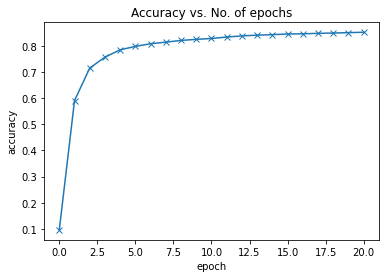

In [160]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Test on individual images

In [161]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


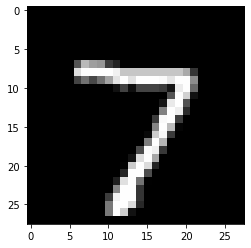

In [162]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [163]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  # .unsqueeze add another dimension at the beginning of the 1x28x28 tensor
  # => it makes a 1x1x28x28 tensor
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 Predicted: 7


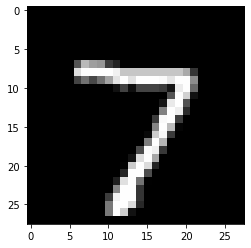

In [164]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

Label: 0 Predicted: 0


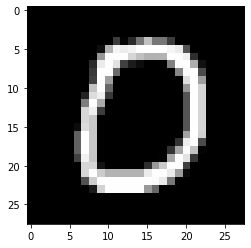

In [165]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

Label: 9 Predicted: 9


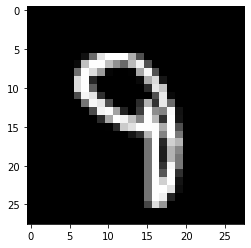

In [166]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))